In [32]:
import skimage as ski
import numpy as np
from matplotlib import pyplot as plt

In [33]:
image_path = './image.png'
cat_path  = './cat.jpg'

In [34]:
cat_image = ski.io.imread(cat_path)
cat_image_2d = cat_image[..., 0]
cat_image.shape

(183, 275, 3)

In [35]:
image = ski.io.imread(image_path)
image_2d = image[..., 0]
image.shape

(3741, 6650, 3)

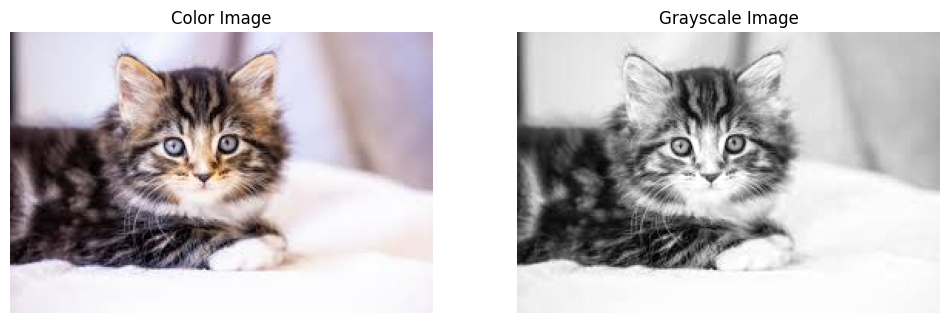

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# color image
ax1.imshow(cat_image) 
ax1.set_title('Color Image')
ax1.axis('off')  

 # grayscale image
ax2.imshow(cat_image_2d, cmap='gray')
ax2.set_title('Grayscale Image')
ax2.axis('off') 
 
plt.show()




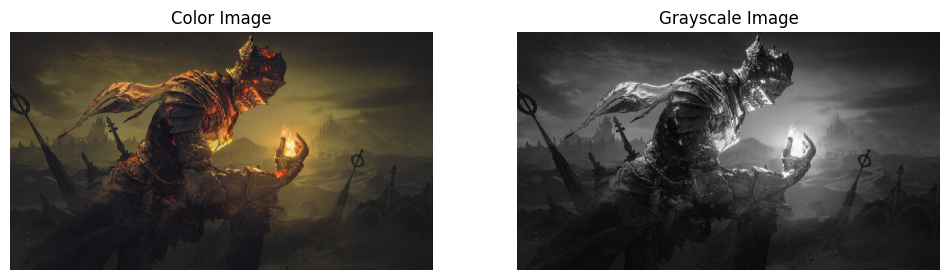

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# color image
ax1.imshow(image) 
ax1.set_title('Color Image')
ax1.axis('off')  

 # grayscale image
ax2.imshow(image_2d, cmap='gray')
ax2.set_title('Grayscale Image')
ax2.axis('off') 
 
plt.show()




In [43]:

# Function to perform SVD-based image compression
def svd_compress(image, k):
    # Convert the image to grayscale
    gray_image = ski.color.rgb2gray(image)  # Converts RGB to grayscale
    
    # Perform SVD on the grayscale image
    U, S, VT = np.linalg.svd(gray_image, full_matrices=False)
    
    # Keep only the top k singular values (create a reduced Σ matrix)
    S_reduced = np.diag(S[:k])
    
    # Keep only the first k columns of U and rows of VT
    U_reduced = U[:, :k]
    VT_reduced = VT[:k, :]
    
    # Reconstruct the compressed image using the reduced matrices
    compressed_image = np.dot(U_reduced, np.dot(S_reduced, VT_reduced))
    
    return compressed_image




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5352984432778388e-12..255.00000000000279].


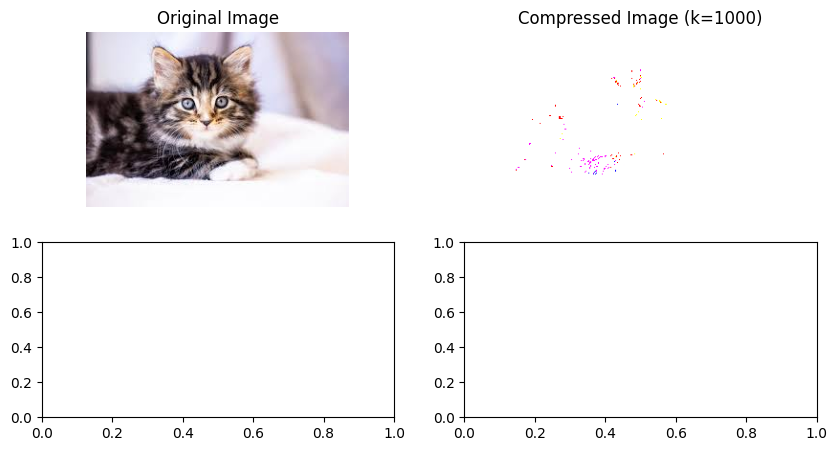

In [45]:
# Parameters for compression
k = 100  # Number of singular values to keep

# Perform image compression using SVD
compressed_cat_image = svd_compress_color(cat_image, k)

compressed_image = svd_compress_color(image, k)

# Plot the original and compressed images
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes[0,0].imshow(cat_image)
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')

axes[0,1].imshow(compressed_cat_image, cmap='gray')
axes[0,1].set_title(f'Compressed Image (k={k})')
axes[0,1].axis('off')

axes[1,0].imshow(image)
axes[1,0].set_title('Original Image')
axes[1,0].axis('off')

axes[1,1].imshow(compressed_image, cmap='gray')
axes[1,1].set_title(f'Compressed Image (k={k})')
axes[1,1].axis('off')

plt.show()